# Multiple Linear Regression: Bike Sharing Assignment

### Import the necessary libraries, load and understand the dataset:

In [664]:
# Importing required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [665]:
# Reading the dataset:
bike_df = pd.read_csv('day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Understanding the dataframe:

In [666]:
# Understanding the dataframe - shape:
bike_df.shape

(730, 16)

In [667]:
# Understanding the dataframe - dtypes:
bike_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [668]:
# Understanding the dataframe - info():
bike_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [669]:
# Understanding the dataframe - describe():
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [670]:
# Understanding the dataframe - column names:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [671]:
# Understanding the dataframe - index:
bike_df.index

RangeIndex(start=0, stop=730, step=1)

In [672]:
# Understanding the dataframe - unique values for categorical variables:
bike_df['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [673]:
# Understanding the dataframe - unique values for categorical variables:
bike_df['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

### Data cleansing - Preprocess the data:

#### Step 1: Missing(Null) Value treatment:

In [674]:
# 1. Data cleansing - Missing(Null) Value treatment:
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Observation for null value treatment:
- It is clear that there are no missing values. We are good to proceed to next steps of data cleansing.

#### Step 2: Outlier treatment:

In [675]:
# Print number of unique values in all columns:
bike_df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

<Figure size 1152x504 with 0 Axes>

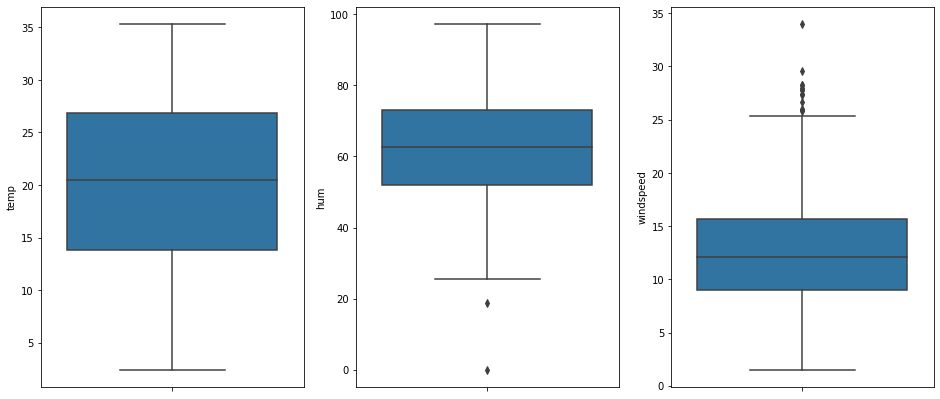

In [676]:
# Drawing box plots for some of the independent continuous variables and check for outliers:
continuous_columns = ['temp', 'hum', 'windspeed']
plt.figure(figsize=(16, 7))  # Define the overall figure

def plot_continuous_vars_for_detecting_outliers(continuous_columns, data_frame):
    """
    This function plots continuous independent variables to visualise the outliers.
    :params continuous_columns: list: representing continuous variable column names.
    :params data_frame: pandas dataframe: representing a data frame.
    
    """
    plt.figure(figsize=(16, 7))  # Define the overall figure 
    
    # Iterate over each subplot:
    for cat_var in enumerate(continuous_columns):
        plt.subplot(1, 3, cat_var[0] + 1)  # register the subplot
        sns.boxplot(data=data_frame, y=cat_var[1]) # plot the box plot
    plt.show()
    
# Calling the above function:
plot_continuous_vars_for_detecting_outliers(continuous_columns, bike_df_dropped)


#### Observation for Outlier treatment:
- It is clear that there are no extreme outliers. We are good to proceed to next steps of data cleansing.

#### Step 3: Drop the columns not useful for this analysis:

In [677]:
# Column - "instant" appears to an additional index. We are good to drop the column:
# Here we are also preserving the original dataframe, just in case we need it again:
bike_df_dropped = bike_df.drop(['instant'], axis = 1)

In [678]:
bike_df_dropped.head() # Check the new *_dropped DF:

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [679]:
# Column - "dteday" contains redundant data, since there are separate columns for year and month.
# Morever, we are not analysing the daily trend for bike sharing, so we ca. We are good to drop the column:
bike_df_dropped.drop(['dteday'], axis = 1, inplace = True)

In [680]:
# From the data dictionary, it is clear that the Columns - "casual" and "registered" added together to form the total count "cnt" column.
# Since these columns would add more redundancy to the model, we are good to drop them and only consider "cnt" column as its the target variable:

bike_df_dropped.drop(['casual'], axis = 1, inplace = True)
bike_df_dropped.drop(['registered'], axis = 1, inplace = True)

In [681]:
# FInal check on the Dropped DF:
bike_df_dropped.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Observation for Dropping unrelated columns:
- We have dropped 4 columns - "instant", "dteday", "casual" and "registered" columns. We can now proceed for EDA:

### Exploratory Data Analysis:

#### Step 1: Replacing numerically encoded columns to categorical columns from data dictionary:

In [682]:
# There are some columns with numeric values like weathersit( values - 1, 2 and 3).
# From the data dictionary, it is clear that these are encoding for categorical variables. We will replace these encodings to their categories from the data dictionary:

# Replacing the numeric encoding for weathersit with values from data dict:
"""
From the data dict():
weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy --> (good)
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist --> (moderate)
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  --> (bad)
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  --> (severe)
"""
bike_df_dropped.weathersit.replace({1: 'good', 2: 'moderate', 3: 'bad', 4: 'severe'}, inplace = True)#### Observation for Dropping unrelated columns:


In [683]:
# Inspect the Df again:
bike_df_dropped.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [684]:
# We can assign a nice categorical value to all the encoded columns from the data dictitionary like - season, mnth & weekday:
bike_df_dropped.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace = True)
bike_df_dropped.mnth.replace({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sept', 10: 'oct', 11: 'nov', 12: 'dec'},
                            inplace = True)
bike_df_dropped.weekday.replace({0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 5: 'fri', 6: 'sat'}, inplace = True)


In [685]:
bike_df_dropped.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [686]:
bike_df_dropped.shape

(730, 12)

#### Step 2: Pairplot to check the linear relationship between continuous variables (Univariate Analysis):

<Figure size 1152x2304 with 0 Axes>

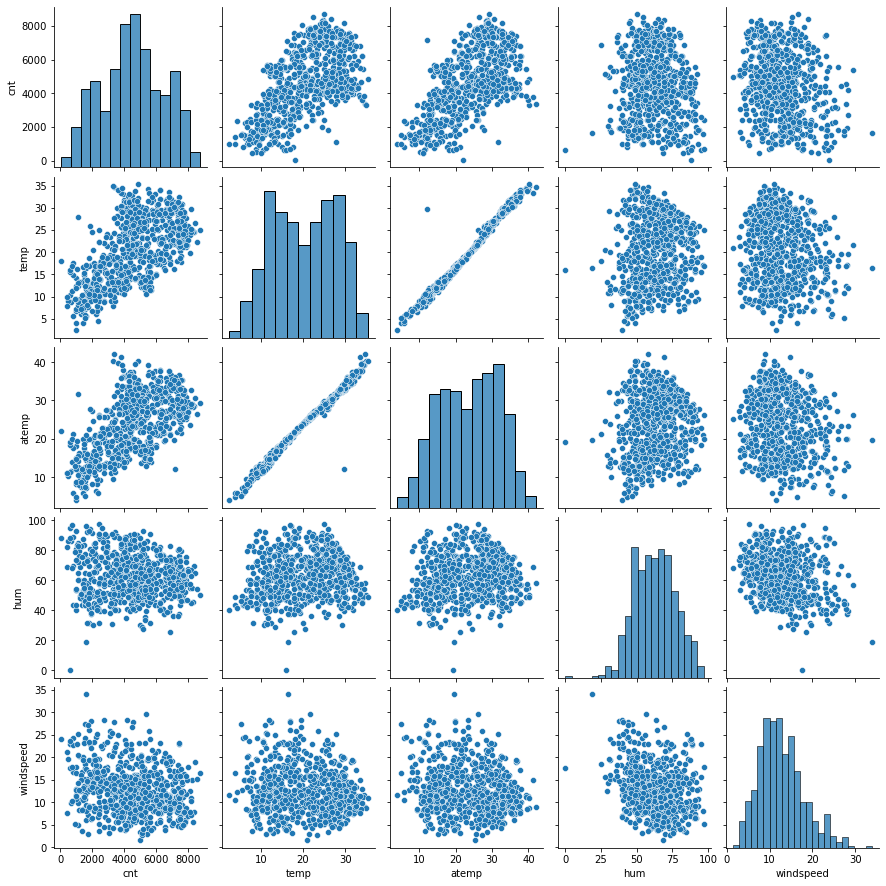

In [687]:
plt.figure(figsize = (16, 32)) # Set the figure size
sns.pairplot(data=bike_df_dropped, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])  # plotting only continuous variables:
plt.show()

In [688]:
# From the above it is evident that "temp" and "atemp" have the highest linear relationship with the target variable "cnt".

#### Step 3: Heat map to check the correlation amongst the independent variables (Multi Variate Analysis):

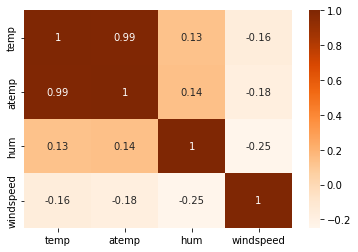

In [689]:
sns.heatmap(bike_df_dropped[['temp','atemp','hum','windspeed']].corr(), cmap='Oranges', annot = True)
plt.show()

In [690]:
# The above shows that the columns "temp" and "atemp" have very high correlation(0.99). We can actually drop one of them, as they will add redundancy to the model.
# Dropping 'atemp' from the dataframe:
bike_df_dropped.drop(['atemp'], axis = 1, inplace = True)

bike_df_dropped.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,43.6957,12.522300,1600


#### Step 4: Univariate analysis on categorical variables against target column 'cnt':

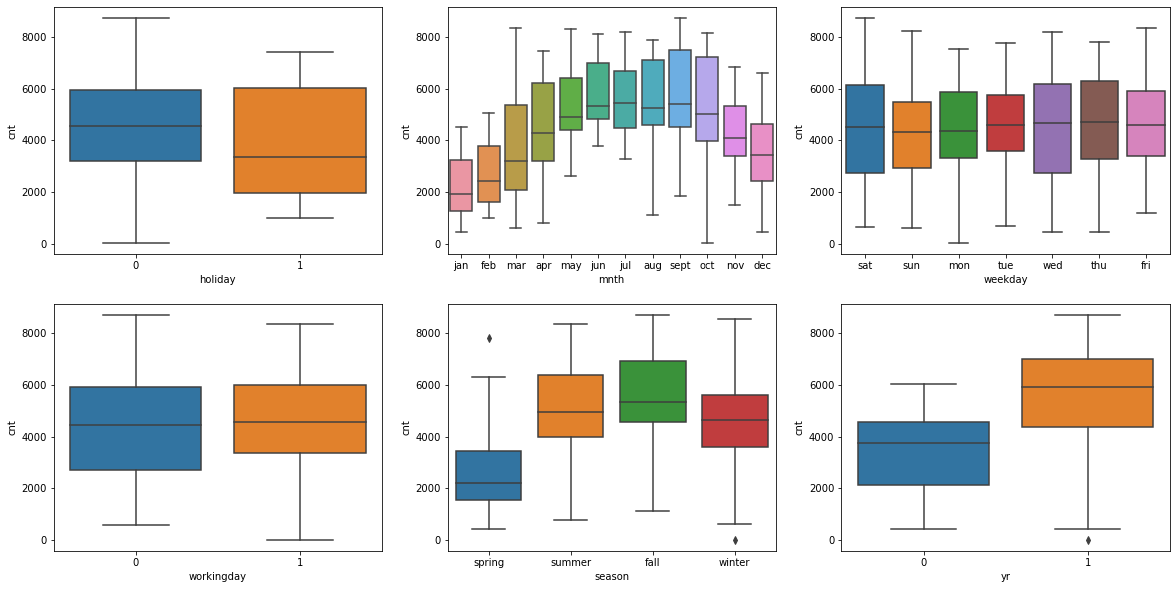

In [691]:
# Drawing box plots for the independent categorical variables against the target variable cnt:
categorical_columns = ['holiday', 'mnth', 'weekday', 'workingday', 'season', 'yr']
target_variable = 'cnt'

def plot_categorical_vars(categorical_columns, target_variable):
    """
    This function plots categorical variables against the target variable "cnt".
    :params categorical_columns: list: representing categorical column names.
    :params target_variable: str: representing target column name
    
    """
    plt.figure(figsize=(20, 10))  # Define the overall figure 
    
    # Iterate over each subplot:
    for cat_var in enumerate(categorical_columns):
        plt.subplot(2, 3, cat_var[0] + 1)  # register the subplot
        sns.boxplot(data=bike_df_dropped, x=cat_var[1], y='cnt') # plot the box plot
    
    plt.show()


# Calling the function:
plot_categorical_vars(categorical_columns, target_variable)
    

#### Observations: Univariate analysis on categorical variables against target column 'cnt':
1. The demand decreases on holidays.
2. There is almost a continous increase in demand from January to September, whereas the demand drops from september to december.
3. The demand doesnot vary much during the day of the week.
4. The demand stays almost the same whether it is a working day or not.
5. The demand increases from spring to fall, and from fall it decreases through winter and spring.
6. The demand has increased in the recent year of 2019, compared to previous year 2018.

###  Plotting Simple Regression Lines

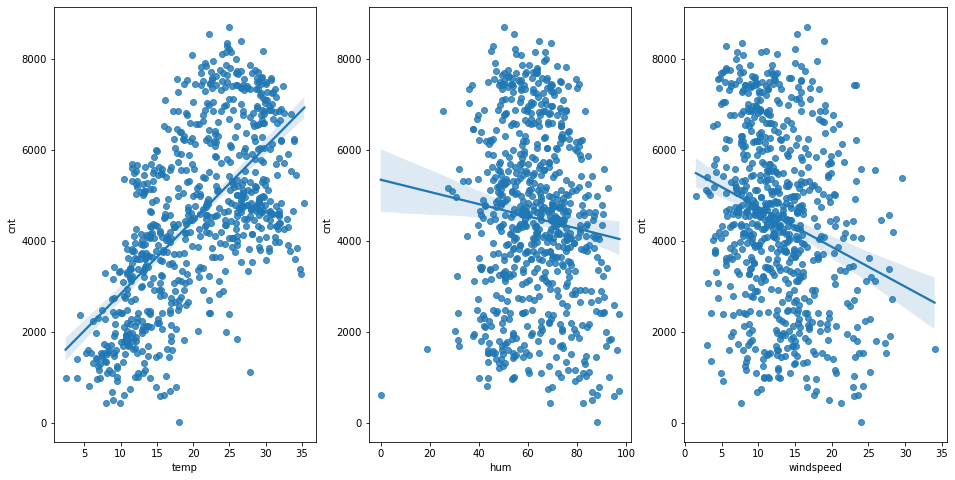

In [692]:
def plot_simple_reg_plots(independent_x_vars, dependent_y_var):
    """
    This function plots the simple linear regression plot to better visualise the simple(univariate) regression best-fit line.
    :params independent_x_vars: list: representing an independent variable like 'temp'.
    :params dependent_y_var: str: representing the dependent/target variable 'cnt'.
    """
    plt.figure(figsize=(16, 8))  # Define the overall figure 
    
    for x_var in enumerate(independent_x_vars):
        plt.subplot(1, 3, x_var[0] + 1)  # register the subplot
        sns.regplot(data=bike_df_dropped, x=x_var[1], y=dependent_y_var) # plot the reg plot
    plt.show()
    
# Dec;are the vars and call the function:
independent_x_vars = ['temp','hum','windspeed']
dependent_y_var = 'cnt'
plot_simple_reg_plots(independent_x_vars, dependent_y_var)


#### Observations from plotting the regression plots:
1. The dependent variable "cnt" increases linearly with the increase in the independent variable "temp".
2. Although the independent variable "hum" is more scattered, but the "cnt" decreases with the increase in humidity.
3. Although the independent variable "windspeed" is again scattered, the "cnt" also decreases with the increase in windspeed.

### Preparing the data for Linear Regression

#### Step 1: Create dummy variables for categorical columns:


In [693]:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.
bike_df_with_dummy_vars = pd.get_dummies(data=bike_df_dropped, columns=["season","mnth","weekday"], drop_first=True)
bike_df_with_dummy_vars = pd.get_dummies(data=bike_df_with_dummy_vars, columns=["weathersit"])  # no drop_first to preserve severe weather data

In [694]:
bike_df_with_dummy_vars.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [695]:
bike_df_with_dummy_vars.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,1,0,1,0


#### Step 2: Split the dataset in 'training' and 'test' datasets before scaling:


In [696]:
# Shape of the DF Before splitting:
bike_df_with_dummy_vars.shape

(730, 30)

In [697]:
# Small 'y' to contain only target variable
y = bike_df_with_dummy_vars.pop('cnt')

# Capital 'X' is all remaining variables:
X = bike_df_with_dummy_vars

# Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)


In [698]:
X.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,80.5833,10.749882,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,59.0435,10.739832,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [699]:
# Inspecting train and test datsets:
print(X_train.shape)
print(X_test.shape)

(511, 29)
(219, 29)


#### Step 3: Scaling the dataset:

In [700]:
# Importing required libraries for scaling and model building:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [701]:
# Scale the continuous numerical variables:
continuous_num_vars = ['temp','hum', 'windspeed']

# Use Normalized scaler to scale
scaler = MinMaxScaler()

# Fit and transform 'training' set only
X_train[continuous_num_vars] = scaler.fit_transform(X_train[continuous_num_vars])

In [702]:
# Inspect X_train after scaling the numeric variables:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
707,1,0,0,0.417140,0.933018,0.243629,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
172,0,0,1,0.865247,0.729068,0.274549,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
14,0,0,0,0.223565,0.513954,0.243603,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
204,0,0,0,0.989306,0.567625,0.267859,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
182,0,0,0,0.871664,0.458136,0.150755,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [703]:
X_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.483366,0.023483,0.706458,0.552390,0.644967,0.317738,0.244618,0.254403,0.252446,0.088063,...,0.064579,0.152642,0.135029,0.135029,0.144814,0.150685,0.138943,0.031311,0.626223,0.342466
std,0.500213,0.151581,0.455831,0.230467,0.149518,0.167252,0.430282,0.435952,0.434842,0.283664,...,0.246023,0.359994,0.342090,0.342090,0.352258,0.358092,0.346226,0.174328,0.484280,0.474999
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343347,0.524903,0.197851,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.551893,0.650064,0.294759,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.757231,0.752469,0.406464,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Building the Model:

#### Start with the Automated Approach using RFE(Recursive Feature Elimination):

In [704]:
# Build a Linear Regression model using SKLearn for RFE:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [705]:
# Reduce the number of features to say 15 using automated approach
rfe = RFE(lr, 15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [706]:
# Inspect the Columns after RFE and their associated weights:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 11),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 5),
 ('mnth_jan', False, 4),
 ('mnth_jul', False, 12),
 ('mnth_jun', False, 13),
 ('mnth_mar', False, 14),
 ('mnth_may', False, 6),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 9),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 7),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 10),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [707]:
# Inspect the columns selected by RFE:
cols_selected_by_rfe = X_train.columns[rfe.support_]
cols_rejected_by_rfe = X_train.columns[~rfe.support_]

print(f"Columns selected by RFE: \n{cols_selected_by_rfe}")
print(f"Columns NOT selected by RFE: \n{cols_rejected_by_rfe}")

Columns selected by RFE: 
Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')
Columns NOT selected by RFE: 
Index(['mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_mon',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')


#### Continue with the manual approach using the columns selected by RFE(Recursive Feature Elimination):

#### Define two helper functions:

In [708]:
# Define 2 functions that we will use to build the models and to check the VIFs amongst the features:

def lr_model_builder(columns_to_be_used):
    """
    This function builds a linear regression model usign statsmodel and returns the same to the caller.
    :params columns_to_be_used: list: representing the columns to be used for building the model.
    :returns None.
    """
    print(f"Features selected: {columns_to_be_used}\n\n")
    X_train_sm = sm.add_constant(X_train[columns_to_be_used])
    lrm = sm.OLS(y_train, X_train_sm).fit()
    print(f"--------------------------------------- Model Summary: --------------------------\n{lrm.summary()}")
    print(f"\n\n--------------------------------------- Model Params: --------------------------\n{lrm.params}")

          
def calculate_vifs(columns_to_be_used):
    """
    This function calculates the VIFs(Variance Inflation Factor) for the the given columns and prints the same.
    :params columns_to_be_used: list: representing the columns to be used for building the model.
    :returns None.
    """
    df1 = X_train[columns_to_be_used]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(f"\n\n--------------------------------------- Calculated VIFs: --------------------------\n{vif.sort_values(by='VIF', ascending=False)}")

#### Build Model 1:

In [709]:
# We build the first model using all the columns selected by RFE
cols_for_this_model = list(cols_selected_by_rfe)
lr_model_builder(cols_for_this_model)  # Build the model and print its summary!
calculate_vifs(cols_for_this_model)  # Calculate VIFs and print the report!

Features selected: ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat', 'weekday_sun', 'weathersit_bad', 'weathersit_good', 'weathersit_moderate']


--------------------------------------- Model Summary: --------------------------
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     214.3
Date:                Mon, 09 May 2022   Prob (F-statistic):          4.13e-194
Time:                        10:00:48   Log-Likelihood:                -4110.9
No. Observations:                 511   AIC:                             8250.
Df Residuals:                     497   BIC:                             8309.
Df Model:                          13              

#### Build Model 2:

In [710]:
# Lets remove the "weekday_sun" due to its high VIF value and high p-value:
cols_for_this_model.remove("weekday_sun")
lr_model_builder(cols_for_this_model)  # Build the model and print its summary!
calculate_vifs(cols_for_this_model)  # Calculate VIFs and print the report!


Features selected: ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good', 'weathersit_moderate']


--------------------------------------- Model Summary: --------------------------
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     214.3
Date:                Mon, 09 May 2022   Prob (F-statistic):          4.13e-194
Time:                        10:00:50   Log-Likelihood:                -4110.9
No. Observations:                 511   AIC:                             8250.
Df Residuals:                     497   BIC:                             8309.
Df Model:                          13                             

#### Build Model 3:

In [711]:
# Lets remove the "holiday" due to its high p-value:
cols_for_this_model.remove("holiday")
lr_model_builder(cols_for_this_model)  # Build the model and print its summary!
calculate_vifs(cols_for_this_model)  # Calculate VIFs and print the report!

Features selected: ['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good', 'weathersit_moderate']


--------------------------------------- Model Summary: --------------------------
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     231.6
Date:                Mon, 09 May 2022   Prob (F-statistic):          6.62e-195
Time:                        10:00:53   Log-Likelihood:                -4111.8
No. Observations:                 511   AIC:                             8250.
Df Residuals:                     498   BIC:                             8305.
Df Model:                          12                                        

#### Build Model 4:

In [712]:
# Lets remove the "weathersit_good" due to its high VIF:
cols_for_this_model.remove("weathersit_good")
lr_model_builder(cols_for_this_model)  # Build the model and print its summary!
calculate_vifs(cols_for_this_model)  # Calculate VIFs and print the report!

Features selected: ['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_moderate']


--------------------------------------- Model Summary: --------------------------
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     231.6
Date:                Mon, 09 May 2022   Prob (F-statistic):          6.62e-195
Time:                        10:00:56   Log-Likelihood:                -4111.8
No. Observations:                 511   AIC:                             8250.
Df Residuals:                     498   BIC:                             8305.
Df Model:                          12                                         
Covariance Type: 

#### Build Model 5:

In [713]:
# Lets remove the "hum" with high VIF value and strong negative co-efficient values:
cols_for_this_model.remove("hum")
lr_model_builder(cols_for_this_model)  # Build the model and print its summary!
calculate_vifs(cols_for_this_model)  # Calculate VIFs and print the report!

Features selected: ['yr', 'workingday', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_moderate']


--------------------------------------- Model Summary: --------------------------
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     232.6
Date:                Mon, 09 May 2022   Prob (F-statistic):          2.16e-188
Time:                        10:01:00   Log-Likelihood:                -4130.1
No. Observations:                 511   AIC:                             8284.
Df Residuals:                     499   BIC:                             8335.
Df Model:                          11                                         
Covariance Type:        

#### Build Model 6:

In [714]:
# Lets remove the "season_spring" due to its comparatively high VIF value and high p-values:
cols_for_this_model.remove("season_spring")
lr_model_builder(cols_for_this_model)  # Build the model and print its summary!
calculate_vifs(cols_for_this_model)  # Calculate VIFs and print the report!

Features selected: ['yr', 'workingday', 'temp', 'windspeed', 'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_moderate']


--------------------------------------- Model Summary: --------------------------
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Mon, 09 May 2022   Prob (F-statistic):          8.03e-188
Time:                        10:01:02   Log-Likelihood:                -4134.3
No. Observations:                 511   AIC:                             8291.
Df Residuals:                     500   BIC:                             8337.
Df Model:                          10                                         
Covariance Type:            nonrobust    

### Equation of mutli linear regression model - best fit line:
- cnt = 641.179600 + (yr × 2028.638186) + (workingday × 359.772593) + (temp × 4909.730669) − (windspeed × 1326.736448) + (season_summer × 751.846545) + (season_winter × 1177.096674) + (mnth_sept × 680.720107) + (weekday_sat × 508.495305) − (weathersit_bad × 2353.389109) - (weathersit_moderate × 692.204577)

### Model Selection - Inferences from the final model above:
1. The p-values for all the selected features are zero.
2. The f-statistics for this model is high (251.3).
3. R-squared(0.834) and Adjusted R-Square(0.831) values are good enough at greater than 83%.
4. The difference between R-squared and adjusted R-square is very less, signifying that there are no more features to be eliminated.
5. Almost no multicollinearity displayed by the model with low VIF values.

### Model Evaluation:

#### Step 1: Residual Analysis

In [715]:
final_features_selected = ['yr', 'workingday', 'temp', 'windspeed', 'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_moderate']

# Build a final model using the above identified features with sklearn model:
lr_final = LinearRegression()
lr_final.fit(X_train[final_features_selected], y_train)

# Print the intercept and coefficients:
print(lr_final.intercept_,lr_final.coef_)


641.1795998982666 [ 2028.63818578   359.77259272  4909.73066927 -1326.73644834
   751.84654532  1177.09667408   680.72010703   508.49530502
 -2353.38910913  -692.20457734]


In [716]:
# Predict on the training dataset only to understand the error distribution:
y_train_pred = lr.predict(X_train)

#### Assumption of Linear Regression 1: Error terms are normally distributed with mean at zero.

Text(0.5, 0, 'Errors in cnt')

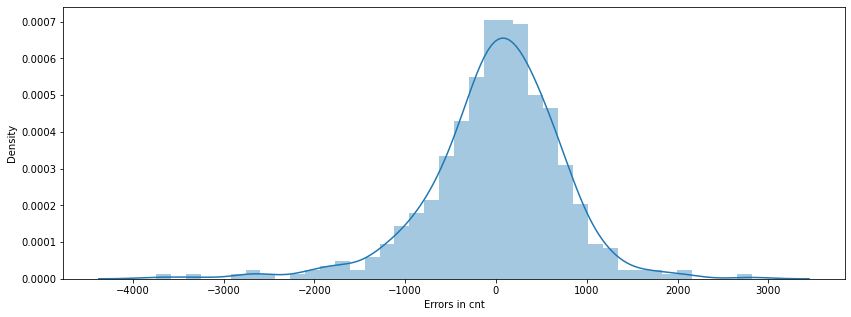

In [717]:
# Residuals:
res = y_train-y_train_pred

# Plot the histogram of the error distribution:
fig =  plt.figure(figsize=(14,5))
sns.distplot((res), bins = 40)
plt.xlabel('Errors in cnt')        

#### Assumption of Linear Regression 2: Homoscedasticity - The residuals have constant variance at every level of x.

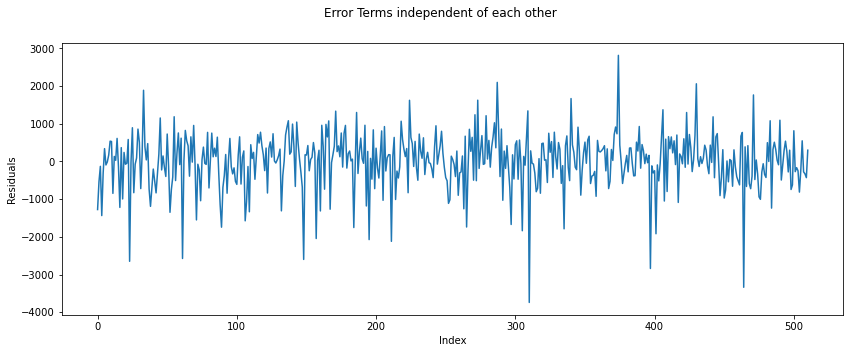

In [718]:
# Error Terms
plt.figure(figsize=(14,5))
error_range = [i for i in range(0, len(X_train), 1)]  # Index range from 0 to length of X_train
plt.plot(error_range, y_train - y_train_pred)  # plt error range against residual values
plt.suptitle('Error Terms independent of each other')
plt.ylabel('Residuals')
plt.xlabel('Index')
plt.show()

In [719]:
# Compare R2-Square scores between y_train and y_predicted
r2_score(y_train, y_train_pred)

0.8566485148009105

#### From the above, the r2_score is greater than 85%, which is good.

#### Assumption of Linear Regression 3: Linearity - There is linear relationship between y and residuals.

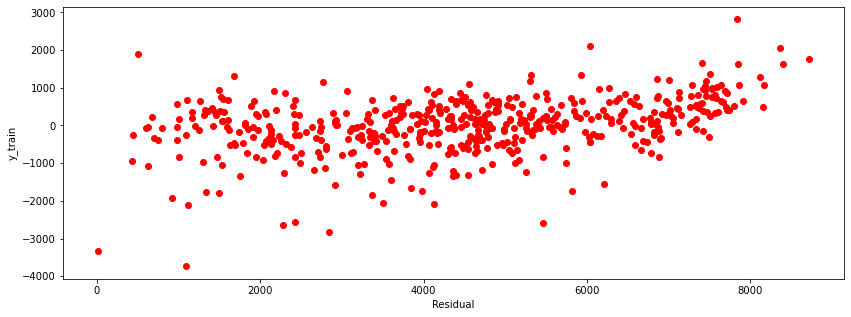

In [720]:
# scatter plot for the linearity check between y_train and the residuals:
plt.figure(figsize=(14,5))
residual = (y_train - y_train_pred)
plt.scatter(y_train, residual, color="red")
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

### Model Prediction:

In [721]:
# Scale variables in X_test
num_vars = ['temp','hum','windspeed']

# Test data to be transformed only, no fitting, so using scaler.transform() only:
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [722]:
# Predict on test dataset:
y_test_pred = lr.predict(X_test)

In [723]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test, y_test_pred)

0.8139615564383937

#### Observation:
- R2 value for predictions on test data(0.813) is almost close to the R2 value of train data(0.834). This high R-squared value indicates that our model is performing good on unseen data (test data) as well.

#### From the above, the r2_score is greater than 81%, which is good.

Text(0, 0.5, 'y_test_pred')

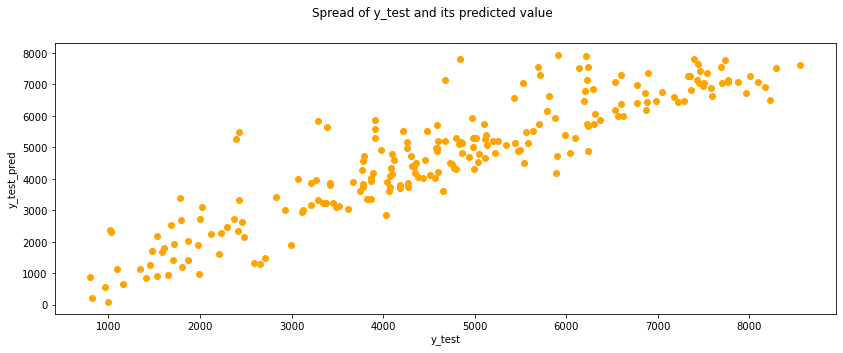

In [724]:
# Plotting y_test and y_test_pred to understand the spread between predicted and actual values:

fig = plt.figure(figsize=(14,5))
plt.scatter(y_test, y_test_pred, color="orange")
fig.suptitle('Spread of y_test and its predicted value')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')


#### Observation: 
- There is linear relationship between the y_test and its predicted value.

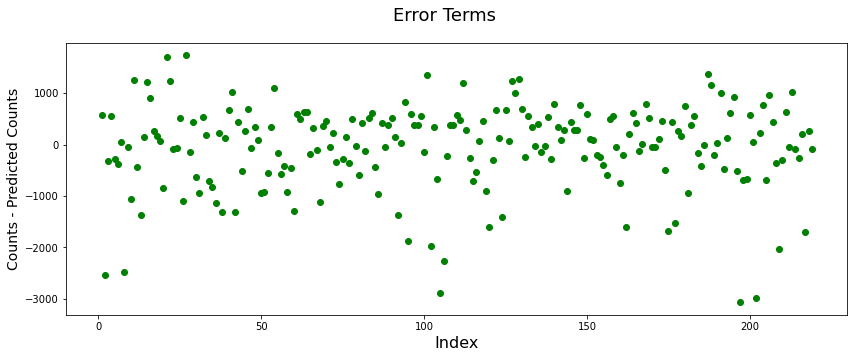

In [725]:
# Error terms
def plot_error_terms_pattern(actual_value, predicted_value):
    """
    Function to plot error terms.
    :params actual_value: Actual value y_test.
    :params predicted_value: Predicted value y_test_pred.
    :returns None.
    """
    counter = [i for i in range(1, 220)]  # Index counter
    fig = plt.figure(figsize=(14,5))
    plt.plot(counter, actual_value - predicted_value, color="green", marker='o', linewidth=2, linestyle="")
    fig.suptitle('Error Terms', fontsize=18)  # Plot heading 
    plt.xlabel('Index', fontsize=16)  # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=14)  # Y-label

# Call the function for test data
plot_error_terms_pattern(y_test, y_test_pred)

#### Observation:
- As we can see that there is no pattern in the error terms and they are randomly distributed. This means the output is explained well by the model.

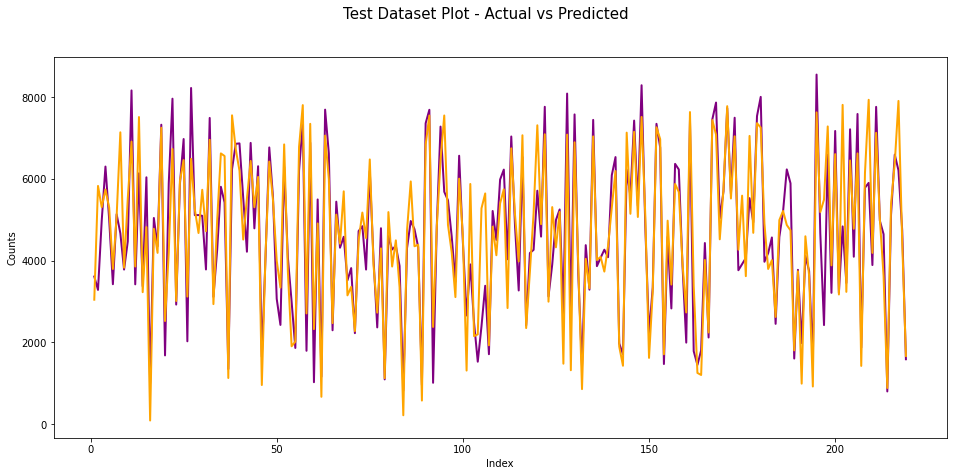

In [726]:
# Define the plot:
fig = plt.figure(figsize=(16, 7))
fig.suptitle('Test Dataset Plot - Actual vs Predicted', fontsize=15)     
plt.xlabel('Index')
plt.ylabel('Counts')
    
def plot_final_target_variable_values(data, count, value_type):
    """
    Function to plot the final y_test values - actual vs predicted.
    :params data: y_test(or y_test_pred)
    :params count: the count of index.
    :params value_type: str: representing the value of data to plot.
    """
    count = [i for i in range(1, count)]  # Input counts
    
    if value_type == 'actual':
        plt.plot(count, data, color="purple", linewidth=2, linestyle="-")
    else:
        plt.plot(count, data, color="orange",  linewidth=2, linestyle="-")

# Call the function for plotting:
plot_final_target_variable_values(y_test, count=len(y_test)+1, value_type='actual')
plot_final_target_variable_values(y_test_pred, count=len(y_test)+1, value_type='predicted')


#### Observation:
- The purple line graph above indicates the "actual" value of the dependent variable, whereas the "orange" line grpah represents the predicted values. As evident, the predicted values are indeed very close to the actual values.

### Model Interpretation:

1. The business should focus on expansion before the month of september, since this is the month with highest demand.
2. Looking at the year on year trend, there is increase in demand. The business can expect increased demand during the coming years post pandemic.
3. There will be less demand during moderate weather(Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist) and bad weather conditions(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds), so the business can focus on maintainance activities during this time.
4. During the weekday saturdays, demand is comparatively on the higher side. So the business should focus on making more bikes available on Saturdays.
5. The business should expect an increase in demand during the seasons of summer and winter.
6. The demand comparatively more during working days comparaed to holidays, so it is better to focus on workingdays for driving business decisions like advertisement and making more bikes available during working days.
7. The most significant features driving(both increasing as well as decreasing) business demand are:
    1. workingday.
    2. temp.
    3. windspeed.
    4. summer season.
    5. winter season.
    6. September month.
    7. Saturday.
    8. Moderate weather(Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist).
    9. Bad weather(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)
    
    
    